In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных и первичный анализ

In [18]:
data = pd.read_csv("./adult.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [19]:
data.sample(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
28146,60,Private,82388,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,38,United-States,<=50K
8303,30,Private,137991,Assoc-voc,11,Never-married,Other-service,Not-in-family,White,Female,0,0,41,United-States,<=50K
40270,41,Local-gov,195897,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K
5209,23,Private,115458,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
5347,50,Private,139793,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,3418,0,38,United-States,<=50K
42022,31,Private,347166,Some-college,10,Divorced,Craft-repair,Own-child,White,Male,4650,0,40,United-States,<=50K
46783,60,Private,198727,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,<=50K
801,32,Private,198183,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K
1062,18,Private,185522,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,33,United-States,<=50K
11132,22,?,379883,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K


In [6]:
data["workclass"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Присутствуют данные как числового типа, так и типа object.  
Нет пропусков со значением null, но есть пропуски со значением '?'.

# Обработка пропусков

Есть неявные пропуски - отдельные параметры со значением '?'.  
Удаление таких пропусков можно сделать после преобразования категориальных признаков удалением столбцов с заголовком '*_?'  
Датасет относитьно небольшой и удаление пропусков может исказить "общую картину".  

# Гистограмма распределения по возрасту

<AxesSubplot: >

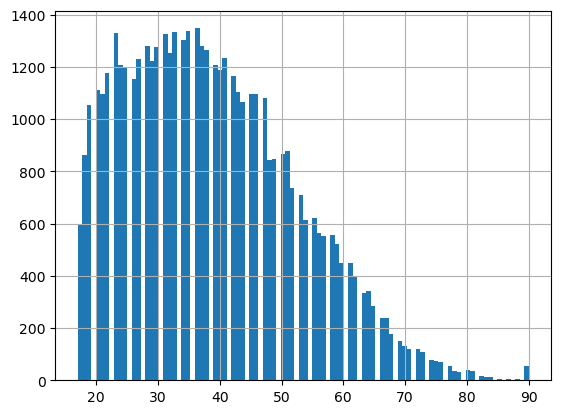

In [75]:
data1["age"].hist(bins=100)

Максиальное кол-во данных смещено к участникам в возрасте 37 лет (что также можно видеть в выводе describe выше).  

# Гистограмма распределения по кол-ву рабочих частов в неделю

<AxesSubplot: >

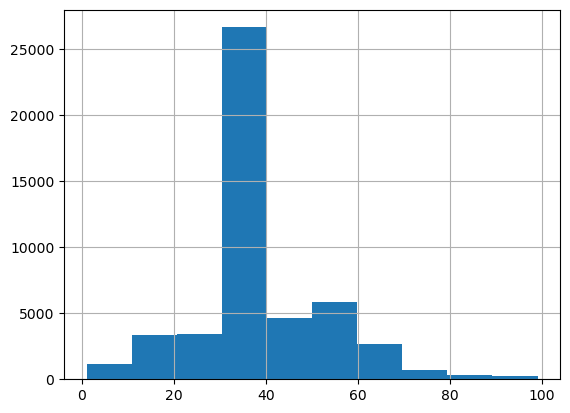

In [74]:
data1["hours-per-week"].hist(bins=10)

Максиальное кол-во данных относится к участникам с 40-часовой рабочей неделей.

# Преобразование категориальных признаков

In [39]:
data1 = pd.get_dummies(data)
data1.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       ...
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia', 'income_<=50K',
       'income_>50K'],
      dtype='object', length=110)

# Разделение выборки на обучающее и тестовое подмножество

In [38]:
data_train, data_test = train_test_split(data1, test_size=0.2, random_state=12345)
data_train.shape, data_test.shape

((39073, 110), (9769, 110))

# Отделение целевой переменной в обучающем подмножестве

In [45]:
data_train_target = data_train['income_>50K']
data_train_workset = data_train.drop(['income_<=50K','income_>50K'], axis=1)
data_train_target.shape, data_train_workset.shape

((39073,), (39073, 108))

# Отделение целевой переменной в тестовом подмножестве

In [46]:
data_test_target = data_test['income_>50K']
data_test_workset = data_test.drop(['income_<=50K','income_>50K'], axis=1)
data_test_target.shape, data_test_workset.shape

((9769,), (9769, 108))

# Обучение модели логистической регрессии на обучающем множестве

In [52]:
model_lr = LogisticRegression(random_state=12345, max_iter=1000)
model_lr.fit(data_train_workset, data_train_target)
result_lr = model_lr.score(data_train_workset, data_train_target)
result_lr

0.8234074680725821

# Предсказание уровеня дохода для тестового множества и сравнение с истинным значением

In [54]:
predict_lr = model_lr.predict(data_test_workset)
result_lr_test = accuracy_score(data_test_target, predict_lr)
result_lr_test

0.8250588596581021

# Обучение модели опорных векторов на обучающем множестве

In [59]:
model_svm = make_pipeline(StandardScaler(), LinearSVC(random_state=12345, max_iter=5000))
model_svm.fit(data_train_workset, data_train_target)
result_svm = model_svm.score(data_train_workset, data_train_target)
result_svm

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8539144677910577

# Предсказание уровеня дохода для тестового множества и сравнение с истинным значением

In [60]:
predict_svm = model_svm.predict(data_test_workset)
result_svm_test = accuracy_score(data_test_target, predict_svm)
result_svm_test

0.8523902139420616

# Выводы

1. В данных не были обнаружены явные пропуски (NaN), но встречаются значения '?', которые решено было оставить в виду размера датасета и опасения потери данных потенциально имеющих влияние на предсказание значения целевой переменной.
2. Категориальные признаки были преобразованы по принципу OHE кодирования, т.к. применяемые модели не работают с категориальными признаками.
3. SVM модель предлагает чуть лучший результат предсказания.